<a href="https://colab.research.google.com/github/anurag1210/anurag-ml-journey/blob/main/projects/linear-regression/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('housing.csv')

# Display the first few rows
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
 #Finding the missing values
 print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
#from the analysis we see that there 207 total_bedrooms which are missing so we are going to use the median to fill those values
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)

<ipython-input-6-b7d962538247>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)


In [7]:
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [8]:
# Define features and target
X = df[['housing_median_age', 'total_rooms', 'total_bedrooms',
        'population', 'households', 'median_income']]
y = df['median_house_value']

In [9]:
X.head()


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


In [10]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Choosing a linear regression model form sklearn

from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [13]:
#Finding out the value of bias and coefficient

print("Bias (Intercept):", model.intercept_)
print("Weights (Coefficients):", model.coef_)

Bias (Intercept): -47897.58543802879
Weights (Coefficients): [ 1.89699824e+03 -2.00028194e+01  1.01942122e+02 -3.56517934e+01
  1.27029956e+02  4.79589084e+04]


In [14]:
#Checking the weights of the each of the columns
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

housing_median_age: 1896.9982439035618
total_rooms: -20.002819394667007
total_bedrooms: 101.94212151933317
population: -35.65179341882053
households: 127.02995567027037
median_income: 47958.90837012093


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 56713.67487570174
Mean Squared Error (MSE): 5968852333.910648
Root Mean Squared Error (RMSE): 77258.3479884902


In [17]:
#Making predictions

# Show a few actual vs predicted values side by side
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10]
})

print(comparison_df)

     Actual      Predicted
0   47700.0   90372.924730
1   45800.0  134277.709430
2  500001.0  261008.142775
3  218600.0  244930.158538
4  278000.0  209036.447620
5  158700.0  178292.548607
6  198200.0  285240.510411
7  157500.0  216963.240741
8  340000.0  225315.291614
9  446600.0  433709.312737


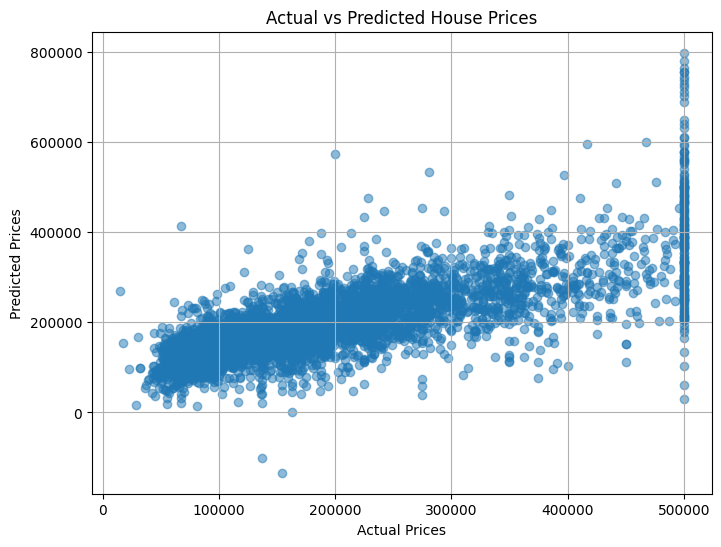

In [18]:
#Plotting the graph betwen predictiopn and actual

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()